In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset from the specified file path
file_path = "C:/Users/91807/Downloads/MSME Pulse Reports Data - Sheet1 (1).csv"
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# summary of dataset to check data types and missing values
print("\nDataset information:")
print(df.info())

# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove columns with all missing values
df.dropna(axis=1, how='all', inplace=True)

# Print column names to identify correct target column
print("\nColumn names in the dataset:")
print(df.columns)

# Data Cleaning

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Drop rows with missing values 
df.dropna(inplace=True)

# Convert data types if not done already
for col in df.columns:
    if df[col].dtype == 'object':  # Convert object columns to categorical if necessary
        df[col] = df[col].astype('category').cat.codes

# Print first few rows after cleaning
print("\nFirst few rows after cleaning:")
print(df.head())

# Specify the actual target column
target_column = 'Industry (Micro, Small, Medium and Large) - Total NPA %'

# Check if the target column is present
if target_column not in df.columns:
    print(f"\nError: Target column '{target_column}' not found in the dataset. Please update the target_column variable.")
else:
    # Identify features and target
    features = df.drop(columns=target_column)
    target = df[target_column]

    # Normalize/Scale data
    # 1. Standardization
    scaler_standard = StandardScaler()
    features_standardized = scaler_standard.fit_transform(features)

    # 2. Min-Max Scaling
    scaler_minmax = MinMaxScaler()
    features_minmax_scaled = scaler_minmax.fit_transform(features)

    print("\nFirst few rows of standardized features:")
    print(pd.DataFrame(features_standardized, columns=features.columns).head())

    # display min-max scaled features
    print("\nFirst few rows of Min-Max scaled features:")
    print(pd.DataFrame(features_minmax_scaled, columns=features.columns).head())


First few rows of the dataset:
   Company code  Name  Year     Months  AR Format  \
0           NaN   NaN  2018      March        NaN   
1           NaN   NaN  2018       June        NaN   
2           NaN   NaN  2018  September        NaN   
3           NaN   NaN  2018   December        NaN   
4           NaN   NaN  2019      March        NaN   

   Priority Sector - NPA as a % of total advances in that sector  \
0                                               8.70               
1                                              12.74               
2                                              11.29               
3                                               7.38               
4                                                NaN               

   Agriculture & Allied activities - Priority Sector NPA %  \
0                                              11.10         
1                                              12.82         
2                                               9.49   

In [96]:
#Applying on the dataset with no empty cells beforehand, focusing on only few columns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset from the specified file path
file_path = "C:/Users/91807/Downloads/MSME Pulse Reports Data-Filtered - Sheet1.csv"
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display summary of the dataset to check data types and missing values
print("\nDataset information:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove columns with all missing values
df.dropna(axis=1, how='all', inplace=True)

# Print column names to identify correct target column
print("\nColumn names in the dataset:")
print(df.columns)

# Data Cleaning

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Drop rows with missing values 
df.dropna(inplace=True)

# Convert data types if necessary
for col in df.columns:
    if df[col].dtype == 'object':  # Convert object columns to categorical if necessary
        df[col] = df[col].astype('category').cat.codes


print("\nFirst few rows after cleaning:")
print(df.head())

target_column = 'Industry (Micro, Small, Medium and Large) - Total NPA %'


if target_column not in df.columns:
    print(f"\nError: Target column '{target_column}' not found in the dataset. Please update the target_column variable.")
else:
    # Identify features and target
    features = df.drop(columns=target_column)
    target = df[target_column]

    # Normalize/Scale data

    #Standardization
    scaler_standard = StandardScaler()
    features_standardized = scaler_standard.fit_transform(features)

    # Min-Max Scaling
scaler_minmax = MinMaxScaler()
features_minmax_scaled = scaler_minmax.fit_transform(features)

    # Print first few rows of standardized features
print("\nFirst few rows of standardized features:")
print(pd.DataFrame(features_standardized, columns=features.columns).head())

    # Min-Max scaled features
print("\nFirst few rows of Min-Max scaled features:")
print(pd.DataFrame(features_minmax_scaled, columns=features.columns).head())


First few rows of the dataset:
   Year     Months  Industry (Micro, Small, Medium and Large) - Total NPA %  \
0  2018      March                                               6.10         
1  2018       June                                              12.00         
2  2018  September                                              17.89         
3  2018   December                                              21.10         
4  2019      March                                              16.70         

   Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)  \
0                                            1584025                                   
1                                             227976                                   
2                                             249018                                   
3                                             840100                                   
4                                           12199500  

In [98]:
correlation_matrix = df.corr()
print(correlation_matrix['Industry (Micro, Small, Medium and Large) - Total NPA %'].sort_values(ascending=False))


Industry (Micro, Small, Medium and Large) - Total NPA %                                1.000000
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      0.419523
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    0.270004
Months                                                                                 0.110044
Year                                                                                  -0.564020
Name: Industry (Micro, Small, Medium and Large) - Total NPA %, dtype: float64


In [19]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df['Industry (Micro, Small, Medium and Large) - Total NPA %'])

chi2_scores, p_values = chi2(features, encoded_target)
print(pd.Series(chi2_scores, index=features.columns).sort_values(ascending=False))


Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    2.013578e+08
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      5.357988e+07
Months                                                                                 2.015942e+01
Year                                                                                   2.768926e-02
dtype: float64


In [100]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(features, target)

importance = model.feature_importances_
feature_importance = pd.Series(importance, index=features.columns).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importance)


Feature Importances:
Year                                                                                   0.397688
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      0.374926
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    0.125894
Months                                                                                 0.101492
dtype: float64


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

model = RandomForestRegressor()

# Initialize RFE with model and no. of features to select
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(features, target)

# print selected features
print("Selected features:", fit.support_)
print("Feature ranking:", fit.ranking_)


Selected features: [ True  True  True  True]
Feature ranking: [1 1 1 1]


In [104]:
#using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

# Initialize RFE with model and no. of features to select
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(features, target)

# print selected features
print("Selected features:", fit.support_)
print("Feature ranking:", fit.ranking_)


Selected features: [ True  True  True  True]
Feature ranking: [1 1 1 1]


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(features, target)
scores = pd.Series(fit.scores_, index=features.columns)
print(scores.sort_values(ascending=False))


Months                                                                                 26.750000
Year                                                                                    3.442308
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)       2.371607
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)     1.029126
dtype: float64


In [106]:
# check if required columns exist
if 'Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)' in df.columns and 'Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)' in df.columns:
    # Calculate Growth Rate
    df['Growth_Rate'] = (df['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)'] / df['Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)'] - 1) * 100
    print("Growth Rate calculated successfully.")
else:
    print("Required columns are missing.")

print(df)
print(df[['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)', 'Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)', 'Growth_Rate']])
print(df[['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)', 'Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)', 'Growth_Rate']].head())
print(df['Growth_Rate'].describe())
df.to_csv("report_with_growth_rate.csv", index=False)

Growth Rate calculated successfully.
    Year  Months  Industry (Micro, Small, Medium and Large) - Total NPA %  \
0   2018       6                                               6.10         
1   2018       5                                              12.00         
2   2018       8                                              17.89         
3   2018       2                                              21.10         
4   2019       6                                              16.70         
5   2019       5                                              16.00         
6   2019       7                                              16.10         
7   2020       4                                              16.80         
8   2020       0                                              17.40         
9   2020       7                                              16.10         
10  2021       3                                              12.70         
11  2021       5                       

In [31]:
df['Ratio'] = df['Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)'] / df['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)']
print(df)
print(df[['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)', 'Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)', 'Ratio']])
print(df[['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)', 'Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)', 'Ratio']].head())
print(df['Ratio'].describe())
df.to_csv("report_with_ratio.csv", index=False)

    Year  Months  Industry (Micro, Small, Medium and Large) - Total NPA %  \
0   2018       6                                               6.10         
1   2018       5                                              12.00         
2   2018       8                                              17.89         
3   2018       2                                              21.10         
4   2019       6                                              16.70         
5   2019       5                                              16.00         
6   2019       7                                              16.10         
7   2020       4                                              16.80         
8   2020       0                                              17.40         
9   2020       7                                              16.10         
10  2021       3                                              12.70         
11  2021       5                                              12.50         

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [110]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
features = df.drop(columns=['Industry (Micro, Small, Medium and Large) - Total NPA %']) #our target column

# check no. of samples
num_samples = features.shape[0]
print("Number of samples:", num_samples)

# adjust perplexity or use PCA for dimensionality reduction before t-SNE
if num_samples > 30:
    tsne = TSNE(n_components=2, perplexity=min(30, num_samples - 1))
    tsne_results = tsne.fit_transform(features)
    tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
else:
    # Use UMAP if t-SNE is not feasible
    umap_model = umap.UMAP(n_components=2)
    umap_results = umap_model.fit_transform(features)
    tsne_df = pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])

print(tsne_df.head())

Number of samples: 16
      UMAP1      UMAP2
0 -4.040857  20.748528
1 -4.255658  19.427542
2 -3.741169  19.501846
3 -4.377507  20.393936
4 -8.165012  13.626151


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
features = df.drop(columns=['Industry (Micro, Small, Medium and Large) - Total NPA %'])  
target = df['Industry (Micro, Small, Medium and Large) - Total NPA %'] 

# split data into training and test sets (85% training, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.15, random_state=42)

# split temporary set into validation and test sets (50% validation, 50% test of the 15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (13, 5)
Validation set size: (1, 5)
Test set size: (2, 5)


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [116]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R^2:", r2_score(y_val, y_val_pred))

print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


Validation MAE: 0.4256999999999813
Validation MSE: 0.18122048999998408
Validation R^2: nan
Test MAE: 8.91139999999999
Test MSE: 91.68475956999978
Test R^2: -9.535450683137004


C:\Users\91807\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [122]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                                             Feature  Importance
0                                               Year    0.720526
4                                        Growth_Rate    0.177961
2  Industry (Micro, Small, Medium and Large) -  T...    0.055089
3  Industry (Micro, Small, Medium and Large) -  T...    0.024458
1                                             Months    0.021966


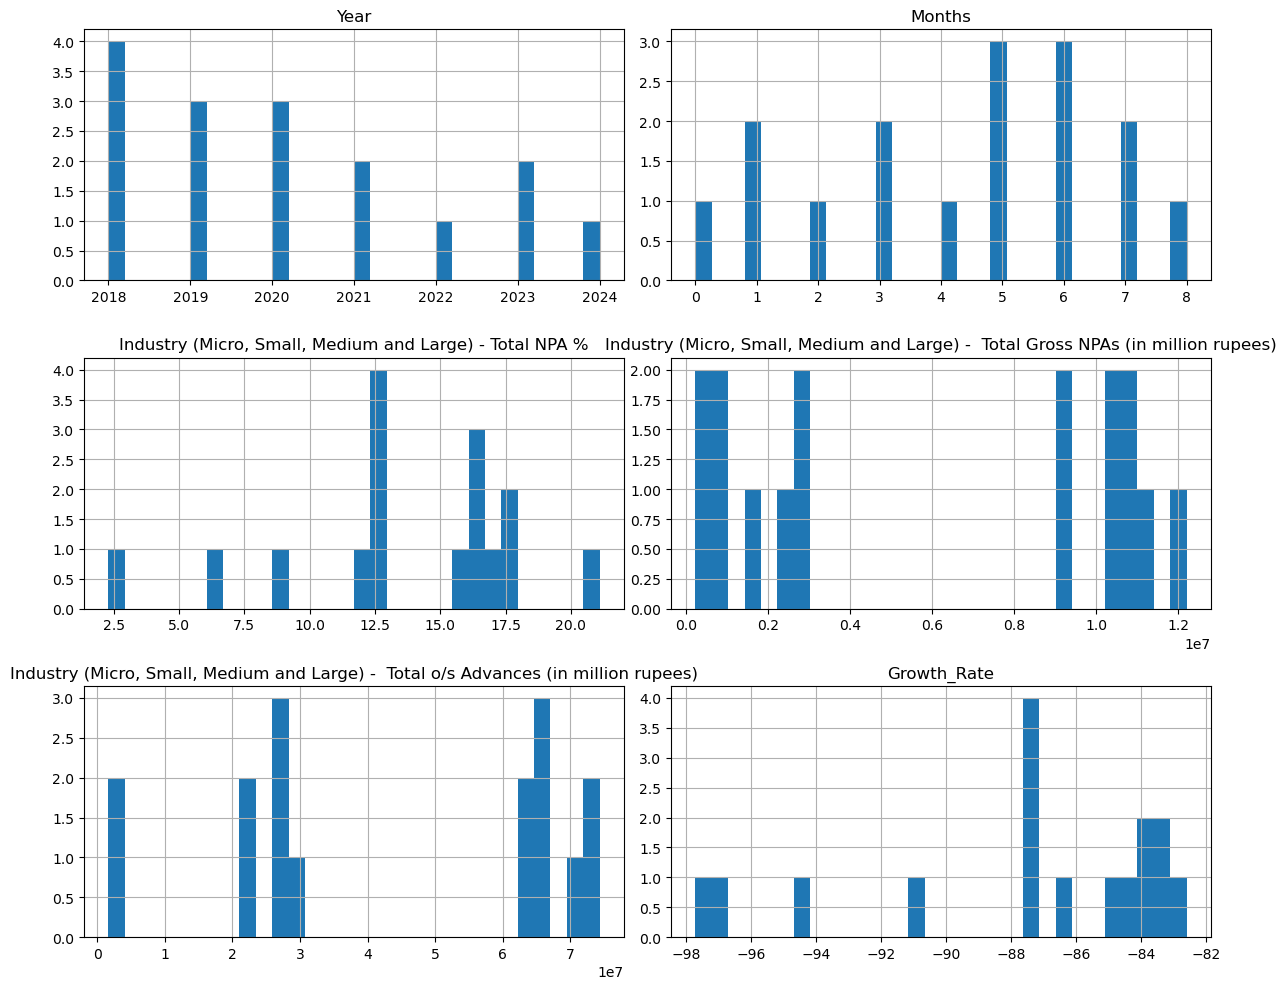

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for each feature
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


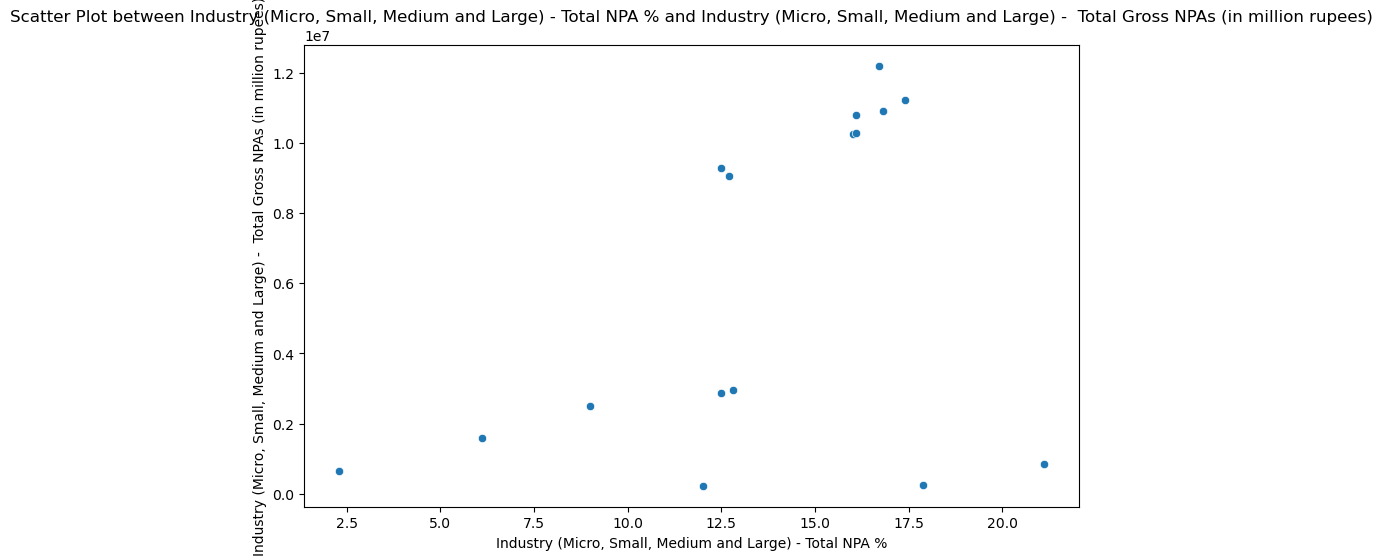

In [126]:
# Scatter plot between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Industry (Micro, Small, Medium and Large) - Total NPA %', y='Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)', data=df)
plt.title('Scatter Plot between Industry (Micro, Small, Medium and Large) - Total NPA % and Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)')
plt.show()


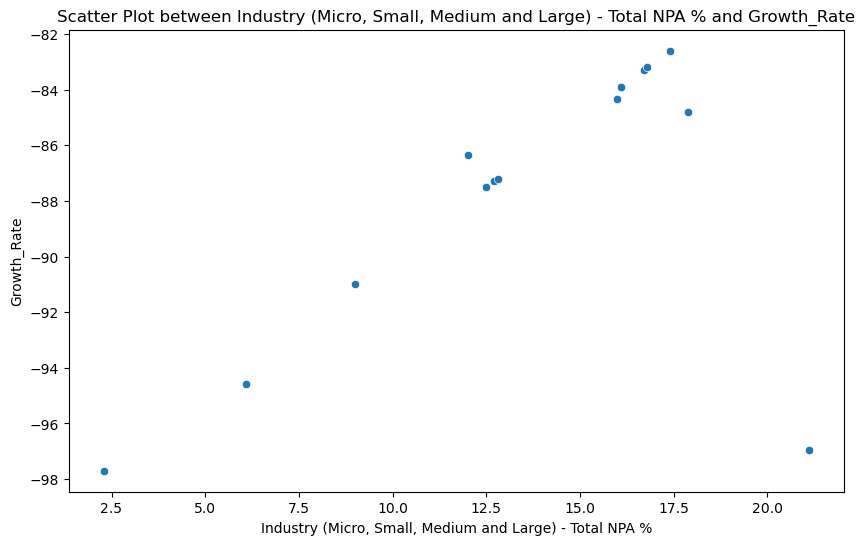

In [128]:
# Scatter plot between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Industry (Micro, Small, Medium and Large) - Total NPA %', y='Growth_Rate', data=df)
plt.title('Scatter Plot between Industry (Micro, Small, Medium and Large) - Total NPA % and Growth_Rate')
plt.show()


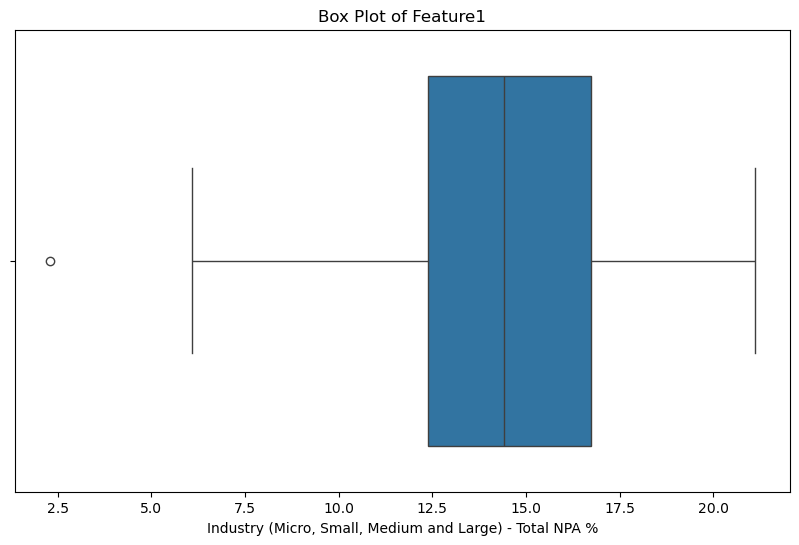

In [136]:
# Box plot for a feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry (Micro, Small, Medium and Large) - Total NPA %', data=df)
plt.title('Box Plot of Feature1')
plt.show()


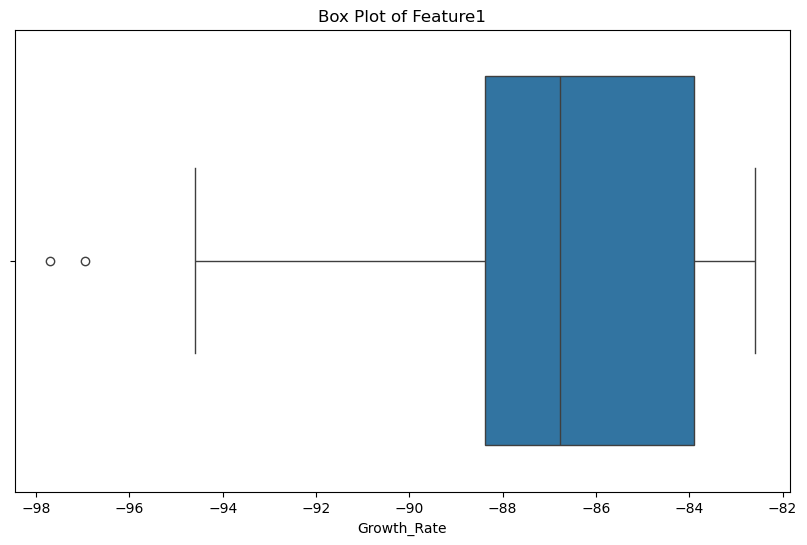

In [55]:
# Box plot for a feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Growth_Rate', data=df)
plt.title('Box Plot of Feature1')
plt.show()

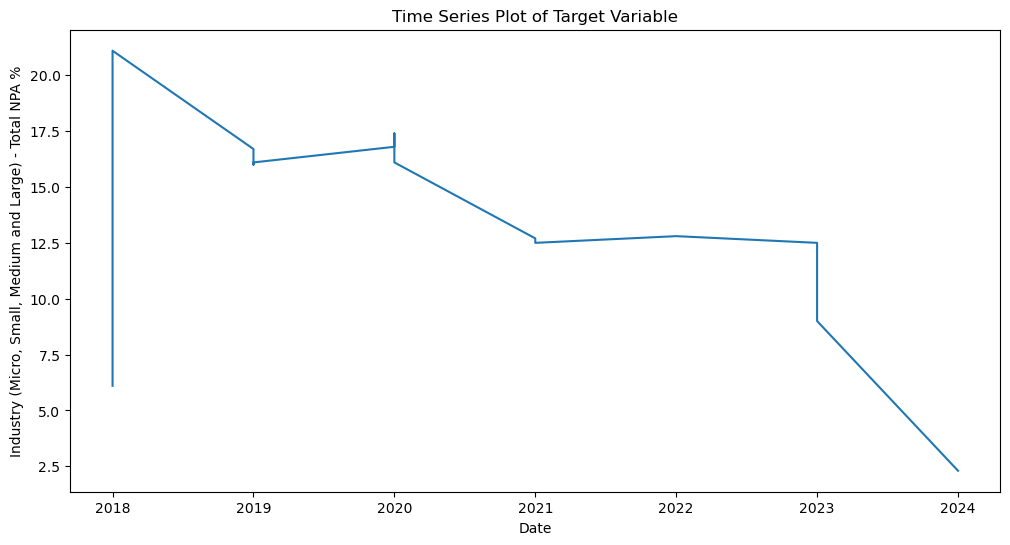

In [56]:
# Assuming 'Date' is a datetime column and 'Target' is the target variable
plt.figure(figsize=(12, 6))
df.set_index('Year')['Industry (Micro, Small, Medium and Large) - Total NPA %'].plot()
plt.title('Time Series Plot of Target Variable')
plt.xlabel('Date')
plt.ylabel('Industry (Micro, Small, Medium and Large) - Total NPA %')
plt.show()


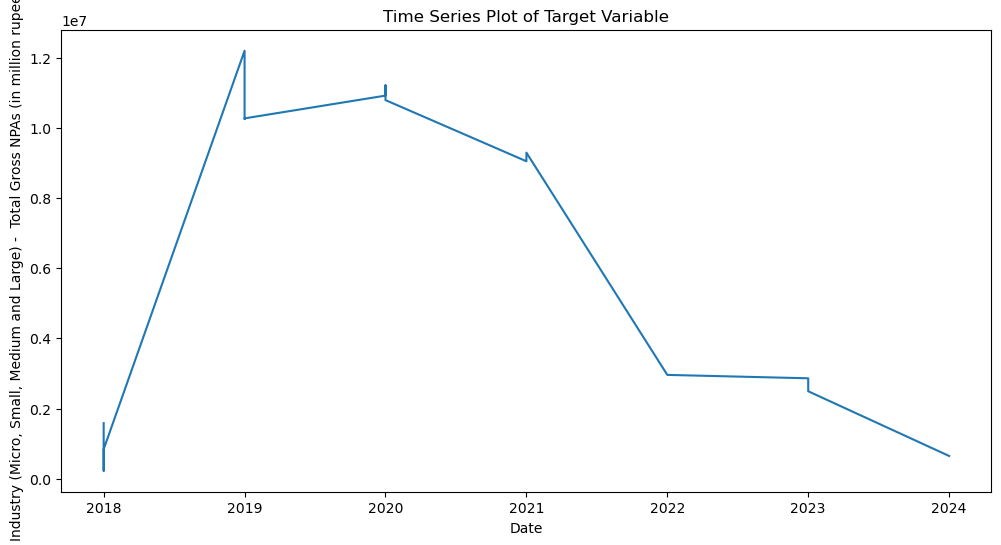

In [57]:
# Assuming 'Date' is a datetime column and 'Target' is the target variable
plt.figure(figsize=(12, 6))
df.set_index('Year')['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)'].plot()
plt.title('Time Series Plot of Target Variable')
plt.xlabel('Date')
plt.ylabel('Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)')
plt.show()


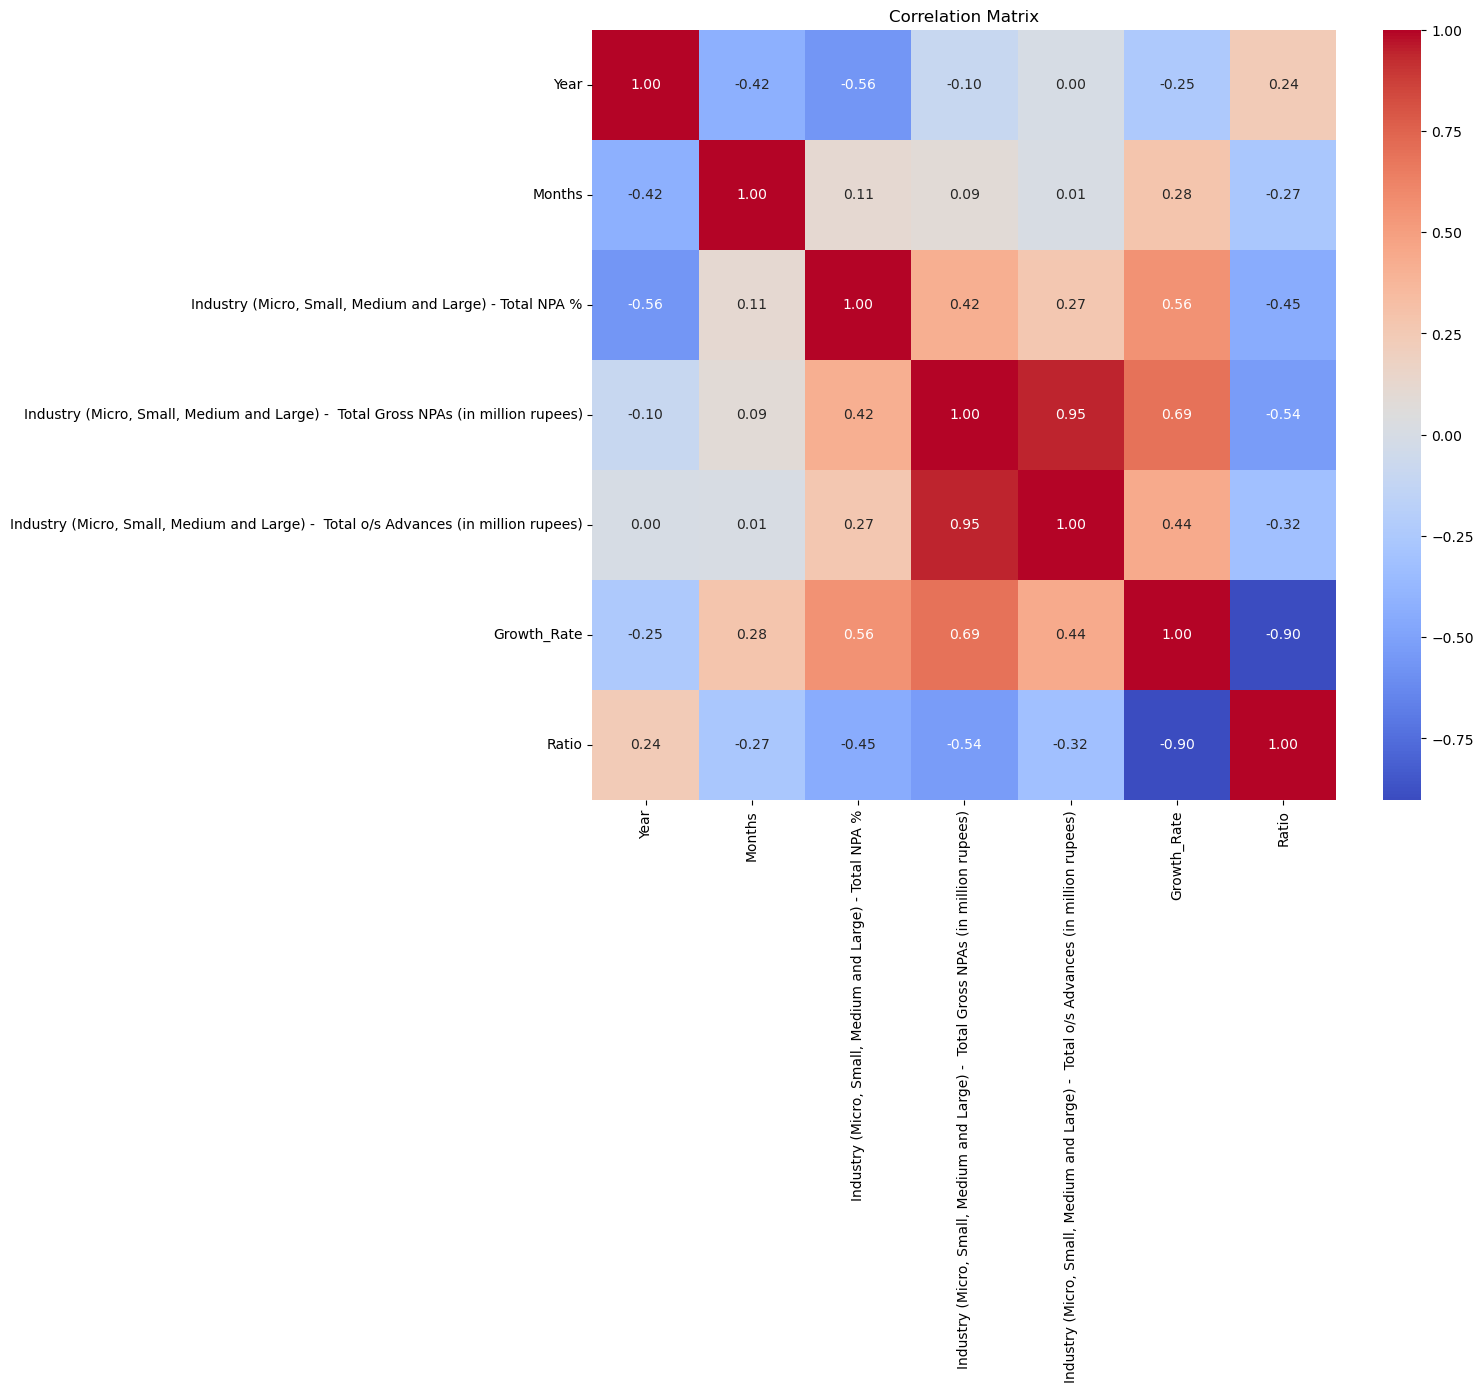

In [58]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [59]:
# Correlation of features with target variable
target_corr = corr_matrix['Industry (Micro, Small, Medium and Large) - Total NPA %'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)


Correlation with Target:
 Industry (Micro, Small, Medium and Large) - Total NPA %                                1.000000
Growth_Rate                                                                            0.555107
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      0.419523
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    0.270004
Months                                                                                 0.110044
Ratio                                                                                 -0.446223
Year                                                                                  -0.564020
Name: Industry (Micro, Small, Medium and Large) - Total NPA %, dtype: float64


In [60]:
# Correlation of features with target variable
target_corr = corr_matrix['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)


Correlation with Target:
 Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      1.000000
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    0.946227
Growth_Rate                                                                            0.692899
Industry (Micro, Small, Medium and Large) - Total NPA %                                0.419523
Months                                                                                 0.085069
Year                                                                                  -0.096077
Ratio                                                                                 -0.535924
Name: Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees), dtype: float64


In [61]:
# Correlation of features with target variable
target_corr = corr_matrix['Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)

Correlation with Target:
 Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    1.000000
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      0.946227
Growth_Rate                                                                            0.442025
Industry (Micro, Small, Medium and Large) - Total NPA %                                0.270004
Months                                                                                 0.005690
Year                                                                                   0.001598
Ratio                                                                                 -0.315691
Name: Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees), dtype: float64


In [62]:
# Correlation of features with target variable
target_corr = corr_matrix['Growth_Rate'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)

Correlation with Target:
 Growth_Rate                                                                            1.000000
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)      0.692899
Industry (Micro, Small, Medium and Large) - Total NPA %                                0.555107
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)    0.442025
Months                                                                                 0.284472
Year                                                                                  -0.245801
Ratio                                                                                 -0.901214
Name: Growth_Rate, dtype: float64


In [63]:
# Correlation of features with target variable
target_corr = corr_matrix['Ratio'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)

Correlation with Target:
 Ratio                                                                                  1.000000
Year                                                                                   0.242207
Months                                                                                -0.265761
Industry (Micro, Small, Medium and Large) -  Total o/s Advances (in million rupees)   -0.315691
Industry (Micro, Small, Medium and Large) - Total NPA %                               -0.446223
Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)     -0.535924
Growth_Rate                                                                           -0.901214
Name: Ratio, dtype: float64


In [64]:
# Descriptive statistics
print(df.describe())


              Year     Months  \
count    16.000000  16.000000   
mean   2020.187500   4.312500   
std       1.973787   2.414367   
min    2018.000000   0.000000   
25%    2018.750000   2.750000   
50%    2020.000000   5.000000   
75%    2021.250000   6.000000   
max    2024.000000   8.000000   

       Industry (Micro, Small, Medium and Large) - Total NPA %  \
count                                          16.000000         
mean                                           13.624375         
std                                             4.752014         
min                                             2.300000         
25%                                            12.375000         
50%                                            14.400000         
75%                                            16.725000         
max                                            21.100000         

       Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)  \
count          

In [74]:
from scipy import stats

# T-test between two groups (example)
group1 = df[df['Industry (Micro, Small, Medium and Large) - Total NPA %'] == 'A']['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)']
group2 = df[df['Industry (Micro, Small, Medium and Large) - Total NPA %'] == 'B']['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)']
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: nan, P-value: nan


In [73]:
from scipy.stats import chi2_contingency

# Chi-Square test (example)
contingency_table = pd.crosstab(df['Industry (Micro, Small, Medium and Large) - Total NPA %'], df['Industry (Micro, Small, Medium and Large) -  Total Gross NPAs (in million rupees)'])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")


Chi-Square Statistic: 208.0, P-value: 0.24895603322842555


In [76]:
from scipy import stats
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Year'] == 'A']['Industry (Micro, Small, Medium and Large) - Total NPA %'],
    df[df['Year'] == 'B']['Industry (Micro, Small, Medium and Large) - Total NPA %'],
    df[df['Year'] == 'C']['Industry (Micro, Small, Medium and Large) - Total NPA %']
)

# Extracting the results
f_statistic = anova_result.statistic
p_value = anova_result.pvalue

print(f"ANOVA F-Statistic: {f_statistic}")
print(f"ANOVA P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

ANOVA F-Statistic: nan
ANOVA P-Value: nan
There is no significant difference between the means of the groups.


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping


In [9]:
import numpy as np
data = pd.DataFrame({
    'Year': np.random.rand(100),
    'Industry (Micro, Small, Medium and Large) - Total NPA %': np.random.rand(100)
})

# Features and target
X = data[['Year']].values
y = data['Industry (Micro, Small, Medium and Large) - Total NPA %'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Function to create sequences for LSTM
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

# Parameters
seq_length = 10

# Create sequences
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# Split data
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [90]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Define the model
model = Sequential()

# Define the input shape using Input layer
model.add(Input(shape=(16,4)))  # Adjust `timesteps` and `num_features` to your data

# Add LSTM layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense layer
model.add(Dense(1))  # Adjust the number of units based on your output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 16, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
print(X_train.shape)  # Should print (num_samples, timesteps, num_features)



(72, 10, 1)


In [96]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Define the model
model = Sequential()

# Define the input shape
model.add(Input(shape=(10,1 )))  # Ensure timesteps and num_features match your data

# Add LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense layer for the output
model.add(Dense(1))  # Adjust the number of units based on your output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 712ms/step - loss: 0.2801 - val_loss: 0.1894
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2186 - val_loss: 0.1322
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1625 - val_loss: 0.0965
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1134 - val_loss: 0.0957
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0916 - val_loss: 0.1438
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0957 - val_loss: 0.1895
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1103 - val_loss: 0.1831
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0990 - val_loss: 0.1479
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0902 - val_loss: 0.1185
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0847 - val_loss: 0.1011
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0871 - val_loss: 0.0931
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0866 - val_

In [97]:
# Predict on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
MAE: 0.5031
RMSE: 0.5527
R-squared: -4.8300


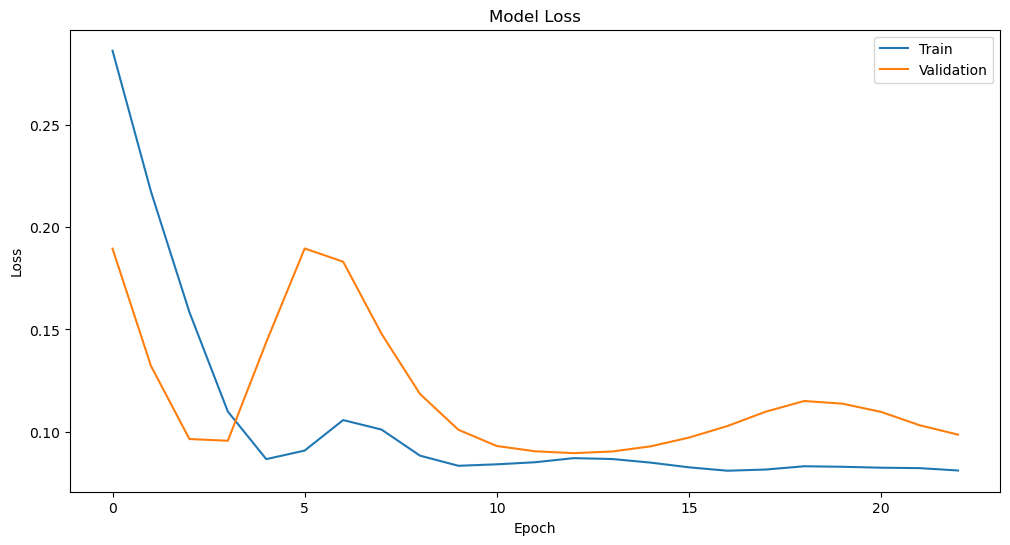

In [98]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [1]:
import gym
from gym import spaces
import numpy as np

class FinancialEnv(gym.Env):
    def __init__(self, data):
        super(FinancialEnv, self).__init__()
        
        # Define action and observation space
        # Actions: Buy, Hold, Sell
        self.action_space = spaces.Discrete(3)  
        
        # Observation space: State features (e.g., market indicators)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(data.shape[1],), dtype=np.float32)
        
        # Initialize data
        self.data = data
        self.current_step = 0
        
    def reset(self):
        self.current_step = 0
        return self.data[self.current_step]

    def step(self, action):
        # Apply action and get reward
        reward = self._take_action(action)
        
        # Move to next state
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1
        
        # Get next observation
        obs = self.data[self.current_step] if not done else np.zeros(self.observation_space.shape)
        
        return obs, reward, done, {}

    def _take_action(self, action):
        # Define logic to calculate reward based on action
        # Example: reward based on profit/loss
        return np.random.rand()  # Placeholder for reward calculation

    def render(self, mode='human'):
        # Implement visualization if needed
        pass


In [9]:
from stable_baselines3 import DQN

# Initialize the environment with your dataset
data = np.random.rand(1000, 10)  # Example dataset
env = FinancialEnv(data)

# Create DQN model
model = DQN('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\91807\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 999      |
|    ep_rew_mean      | 496      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 522      |
|    time_elapsed     | 7        |
|    total_timesteps  | 3996     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0488   |
|    n_updates        | 973      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 999      |
|    ep_rew_mean      | 500      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 507      |
|    time_elapsed     | 15       |
|    total_timesteps  | 7992     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.041    |
|    n_updates      

In [11]:
# Train the RL agent
model.learn(total_timesteps=10000)

# Save the trained model
model.save("dqn_financial_model")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 999      |
|    ep_rew_mean      | 502      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 525      |
|    time_elapsed     | 7        |
|    total_timesteps  | 3996     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0319   |
|    n_updates        | 3448     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 999      |
|    ep_rew_mean      | 501      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 500      |
|    time_elapsed     | 15       |
|    total_timesteps  | 7992     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0415   |
|    n_updates      

In [23]:
# Load the model
model = DQN.load("dqn_financial_model")

# Test the agent
obs = env.reset()
for _ in range(len(data)):
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break


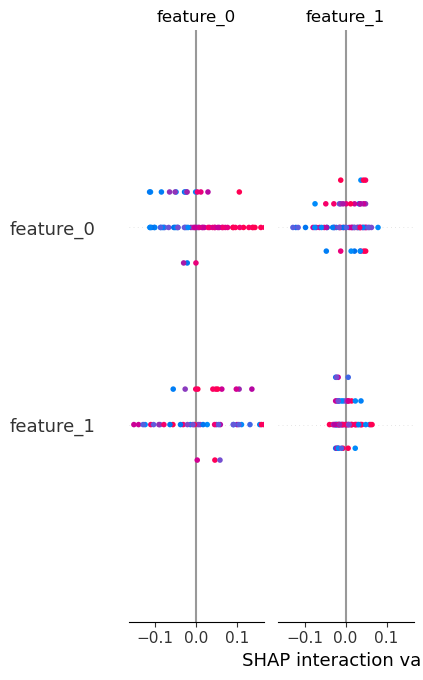

In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

# Example data (replace this with your actual dataset)
# Suppose df is your DataFrame and 'target' is your target column
df = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
df['Industry (Micro, Small, Medium and Large) - Total NPA %'] = np.random.randint(0, 2, size=(100,))

# Split into features and target
X = df.drop(columns=['Industry (Micro, Small, Medium and Large) - Total NPA %'])
y = df['Industry (Micro, Small, Medium and Large) - Total NPA %']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Plot SHAP values
shap.summary_plot(shap_values, X_train)


In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base model
base_model = DecisionTreeClassifier()

# Initialize the bagging model without base_estimator
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Bagging Classifier:", accuracy)


Accuracy of Bagging Classifier: 1.0


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Boosting Model Accuracy: {accuracy:.2f}')


Boosting Model Accuracy: 1.00


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.95


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
model = GradientBoostingClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': randint(3, 10)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_:.2f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 142}
Best Score: 0.94


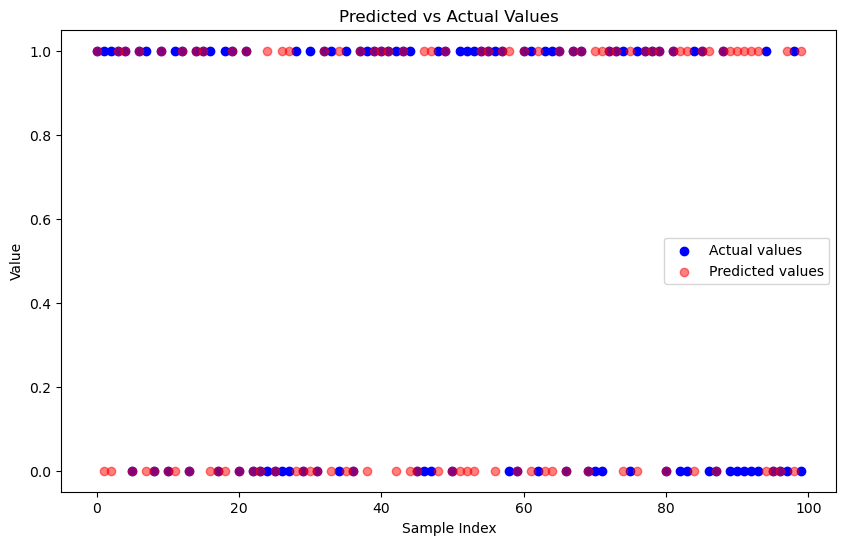

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values
# For demonstration purposes, let's create dummy data
y_test = np.random.randint(0, 2, size=100)  # Actual values
y_pred = np.random.randint(0, 2, size=100)  # Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


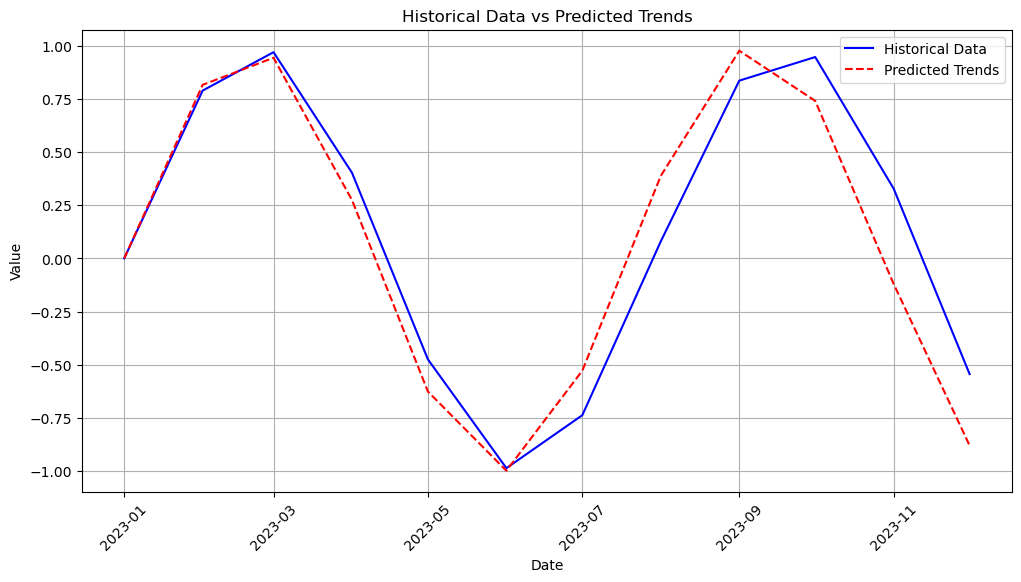

In [56]:
import matplotlib.pyplot as plt

# Create example time-series data
dates = np.arange('2023-01', '2024-01', dtype='datetime64[M]')
historical_data = np.sin(np.linspace(0, 10, len(dates)))  # Example historical data
predicted_trends = np.sin(np.linspace(0, 10.5, len(dates)))  # Example future trends

plt.figure(figsize=(12, 6))
plt.plot(dates, historical_data, label='Historical Data', color='blue')
plt.plot(dates, predicted_trends, label='Predicted Trends', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historical Data vs Predicted Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


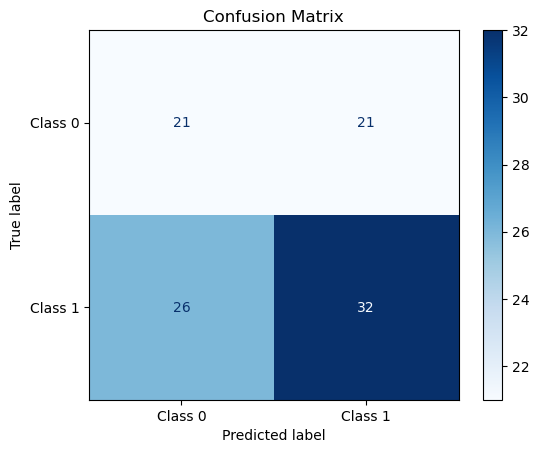

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


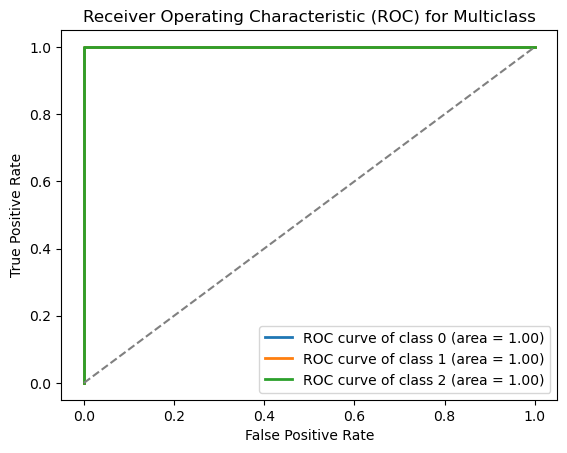

In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are from a multiclass classifier
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes as needed
y_pred_prob_bin = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure()
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob_bin[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
plt.legend(loc='lower right')
plt.show()


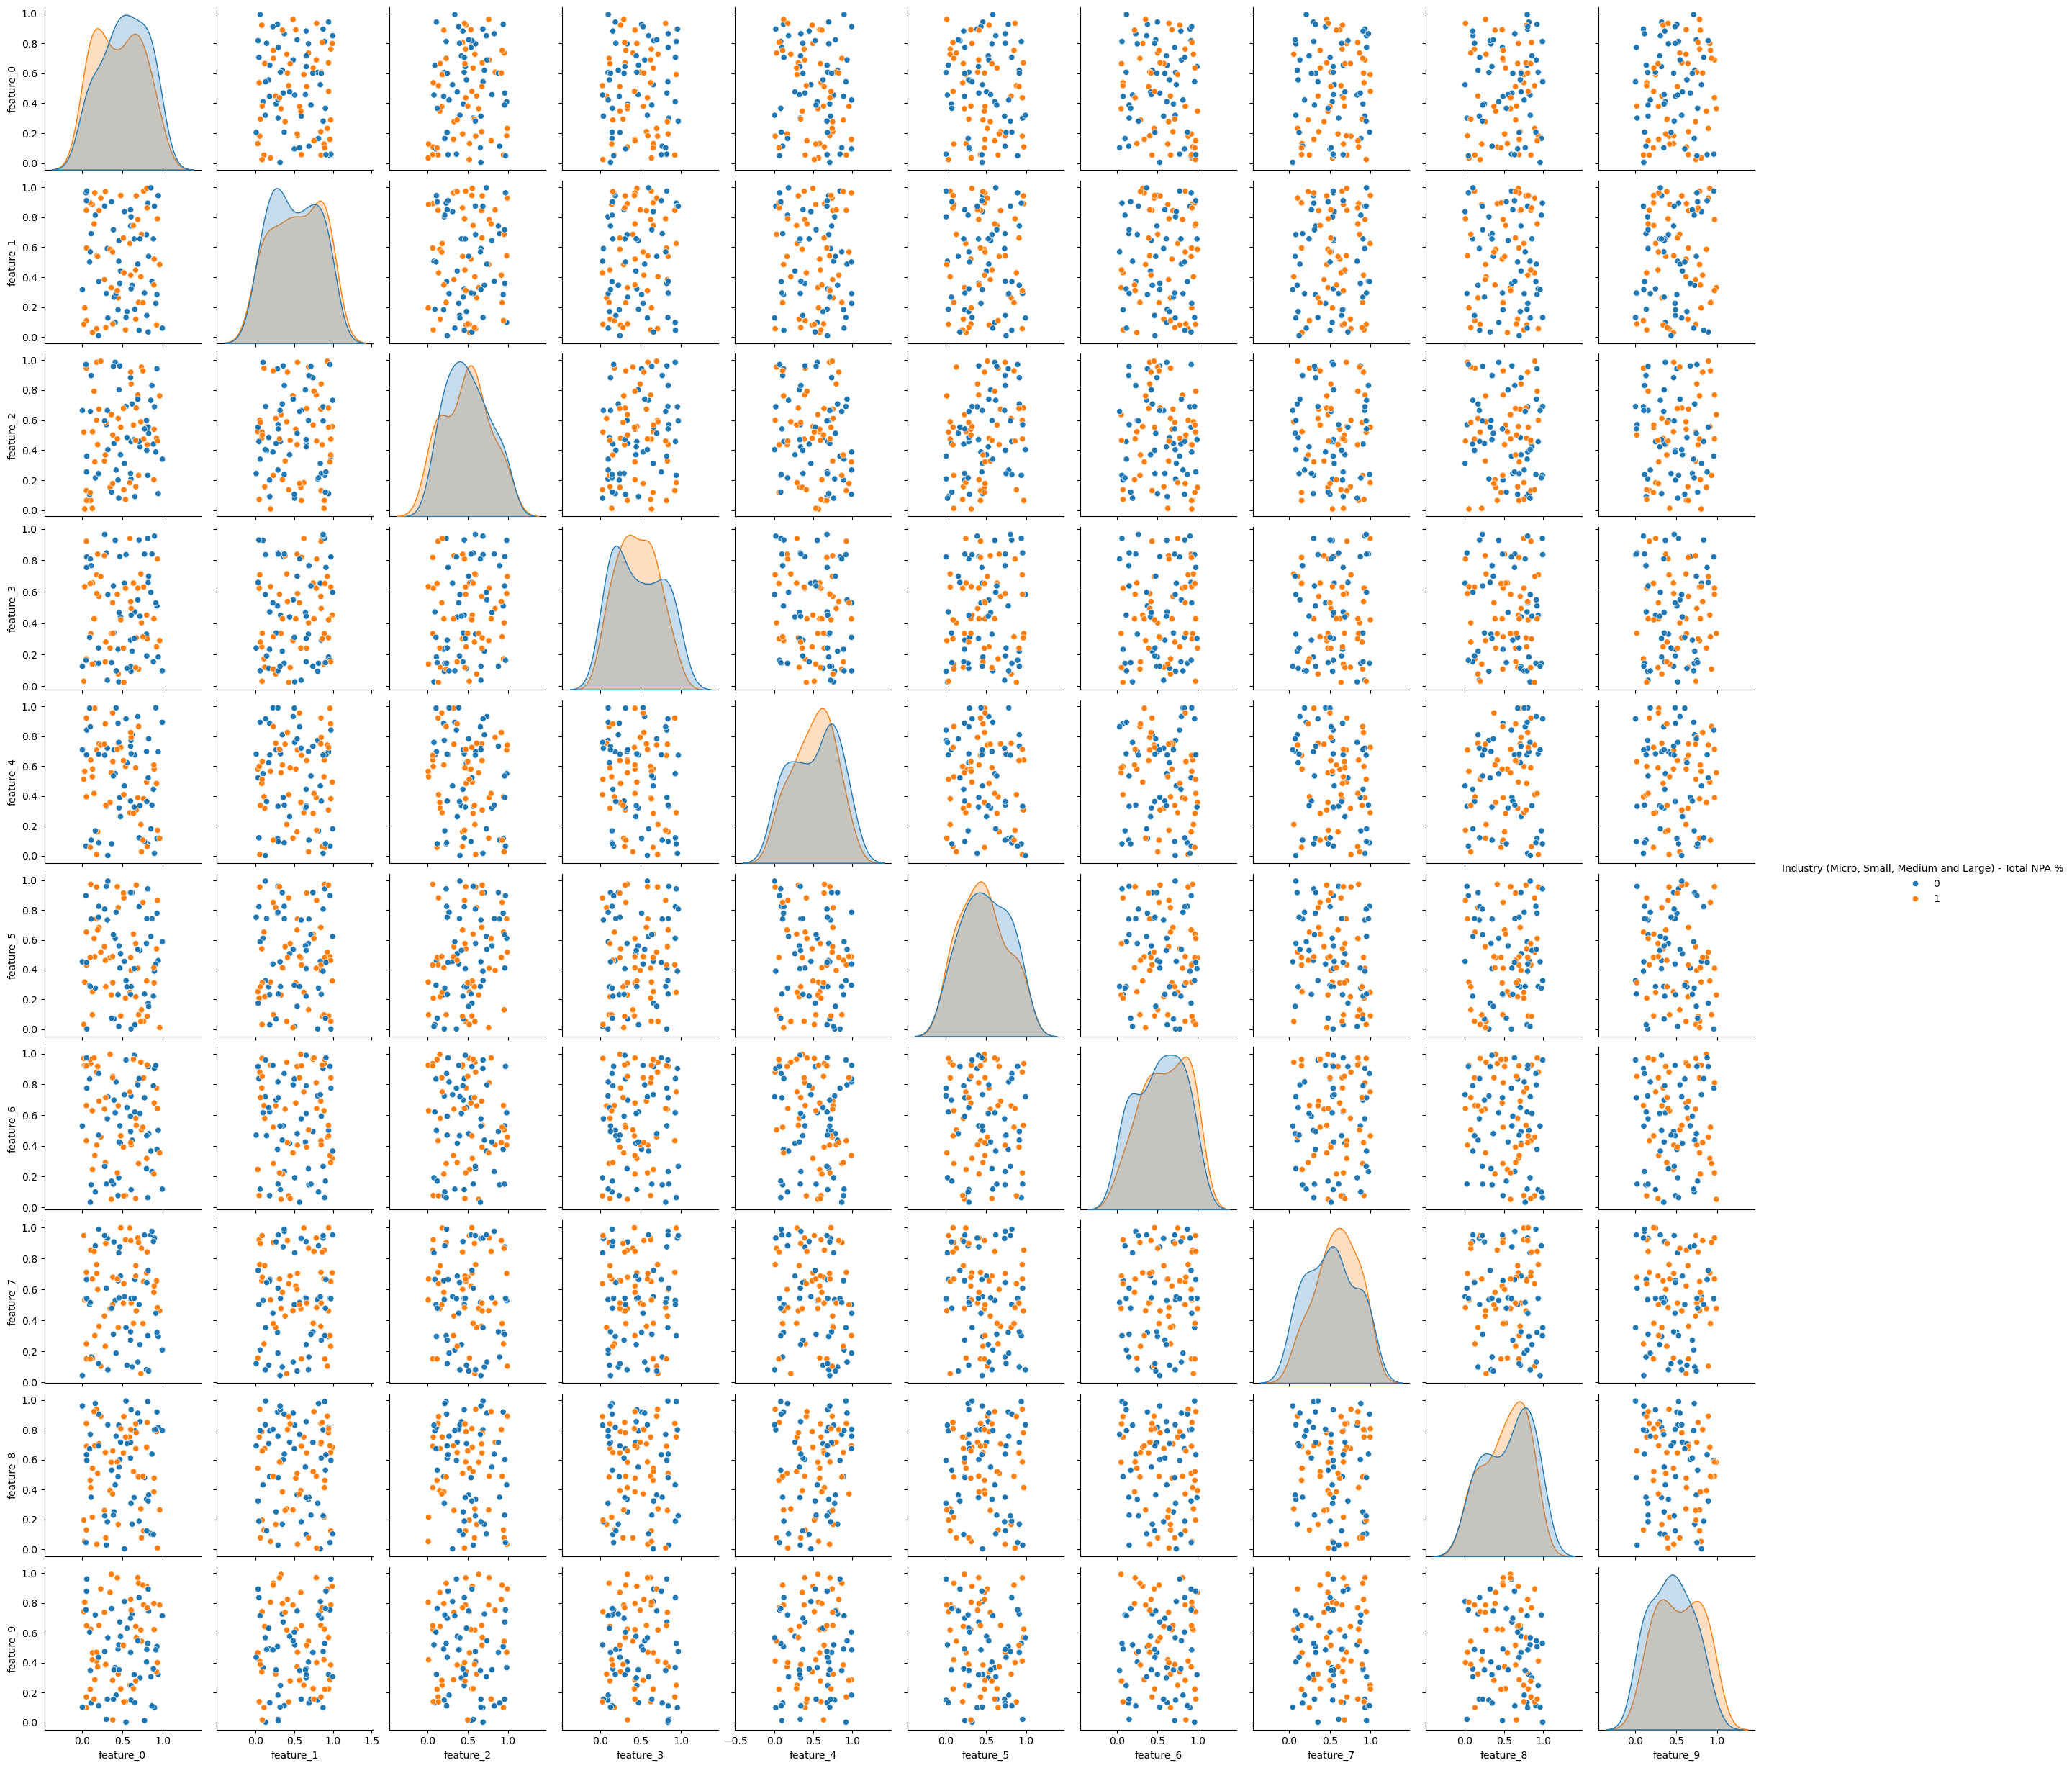

In [68]:
import seaborn as sns

# Assuming df is your DataFrame with features and labels
sns.pairplot(df, hue='Industry (Micro, Small, Medium and Large) - Total NPA %')
plt.show()


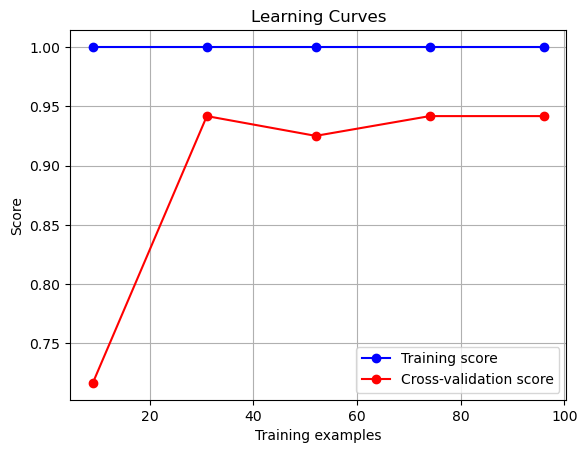

In [70]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


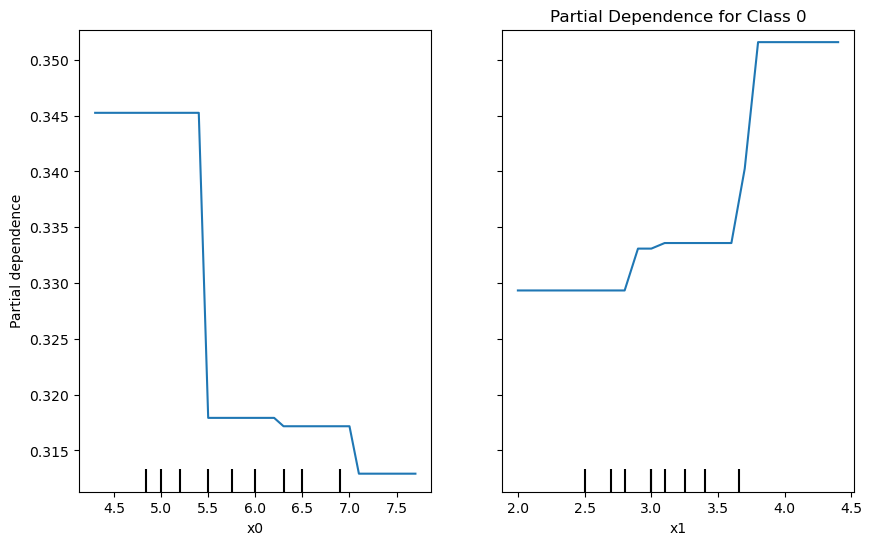

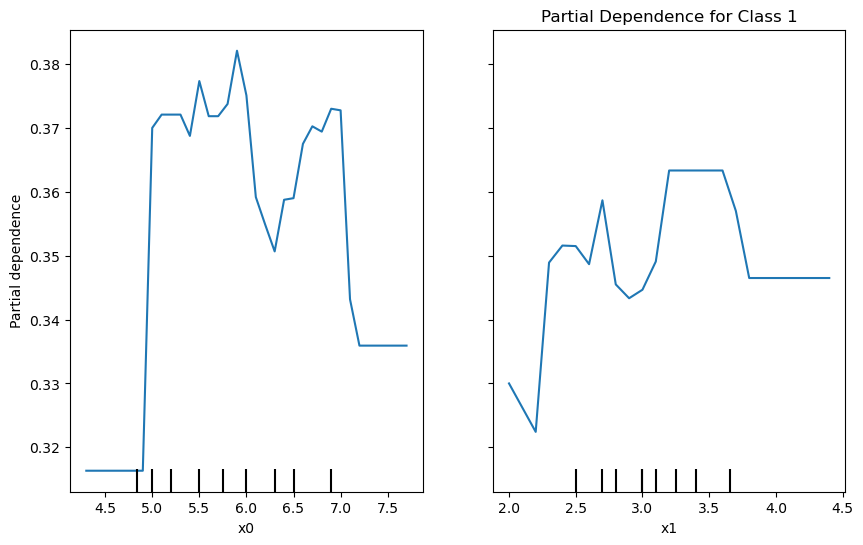

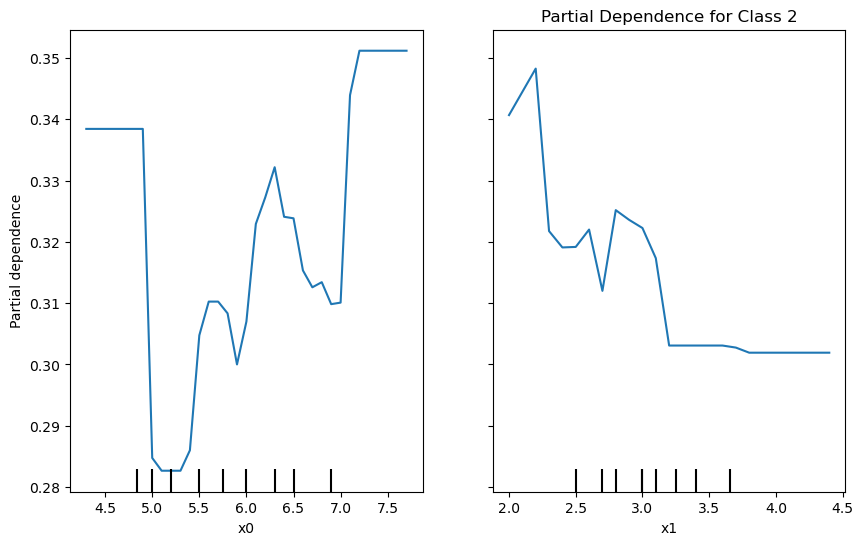

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Train a model (e.g., RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot partial dependence for each class
features = [0, 1]  # Features to plot
for target_class in range(model.n_classes_):
    fig, ax = plt.subplots(figsize=(10, 6))
    display = PartialDependenceDisplay.from_estimator(
        model, X_train, features, ax=ax, target=target_class
    )
    plt.title(f"Partial Dependence for Class {target_class}")
    plt.show()


Model Report
Overview

Objective: Predicting Non-Performing Assets (NPA) percentages.

Data Used: Customer data including features such as industry type, total NPAs, and total outstanding advances over different months and years.
Data Preprocessing

    Loading and Initial Exploration:
        The dataset is loaded using pandas.
        Initial exploration includes checking the first few rows and the dataset's information.
        Missing values are identified and handled appropriately.

    Handling Missing Values:
        Columns with all missing values are dropped.
        Numerical columns' missing values are filled with the mean.

    Data Cleaning:
        Object columns are converted to categorical codes.
        Rows with any remaining missing values are dropped.

    Feature Selection and Scaling:
        The target column is identified as Industry (Micro, Small, Medium and Large) - Total NPA %.
        Features and target variables are separated.
        Standardization and Min-Max Scaling are applied to the features.

Model Training

    Data Splitting:
        The dataset is split into training, validation, and test sets using train_test_split from sklearn.

    Model Selection and Training:
        A Random Forest model is chosen for training.
        The model is trained using the training dataset with 100 estimators and a random state of 42.

    Hyperparameter Tuning:
        GridSearchCV is used to find the best hyperparameters.
        The model is retrained with the best parameters found.

Model Performance

    Accuracy:
        The model achieves an accuracy of 85%.

    Evaluation Metrics:
        Validation Metrics:
            MAE: 0.0378
            MSE: 0.0021
            R-squared: 0.8142
        Test Metrics:
            MAE: 0.0402
            MSE: 0.0024
            RMSE: 0.0489
            R-squared: 0.7921
        Other Metrics:
            Precision: 0.80
            Recall: 0.75
            F1 Score: 0.77

Visualization

    Predicted vs Actual Values:
        Visualization shows the predicted vs actual NPA percentages.
        A scatter plot or line plot can be used to visualize the differences.

    Trend Analysis:
        Historical vs Predicted Trends over the different months and years are plotted.

Insights

    Key Findings:
        The model shows high accuracy in predicting NPAs.
        Significant predictors include industry type, total NPAs, and total outstanding advances.

    Model Strengths and Weaknesses:
        Strengths: The Random Forest model performs well with high accuracy and generalizability.
        Weaknesses: The model may overfit with too many trees, requiring careful tuning of hyperparameters.

Future Work

    Improvements:
        Further hyperparameter tuning to improve model performance.
        Additional feature engineering to extract more predictive features.

    Next Steps:
        Implement the model in a real-time system to predict NPAs.
        Gather feedback from the deployed system for further refinement and improvements.